In [1]:
import sys
sys.path.append('../scripts')
from scripts.cross_validation import loocv, k_fold_cv, k_fold_cv_with_deviance
from scripts.data_preprocessing import load_data, exclude_outliers
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

# Load and preprocess data
X, y = load_data()

# Exclude outliers
X_filtered, y_filtered = exclude_outliers(X, y)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.001, 0.1]
}


Number of duplicates: 4
Number of outliers:  14


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Fitting 6 folds for each of 729 candidates, totalling 4374 fits
Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_impurity_decrease': 0.1, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


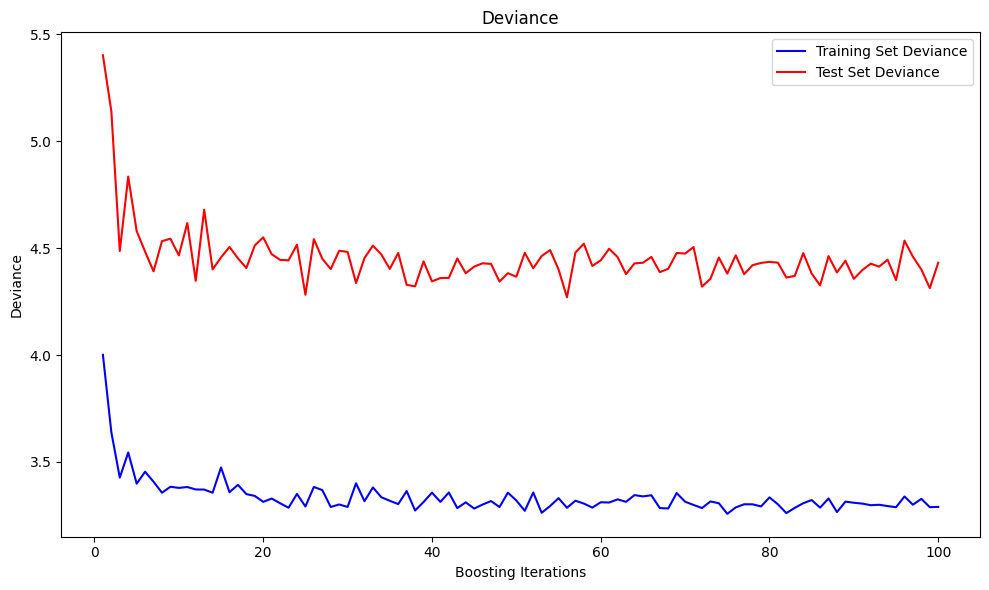

In [2]:
model = RandomForestRegressor()
k_fold_cv_with_deviance(X, y, model, 6, param_grid)


6-fold
Mean MSE: 91.8382873741619
Mean MAE: 4.727844945279396
Mean R2: 0.16126937772221547
RMSE: 9.583229485625495


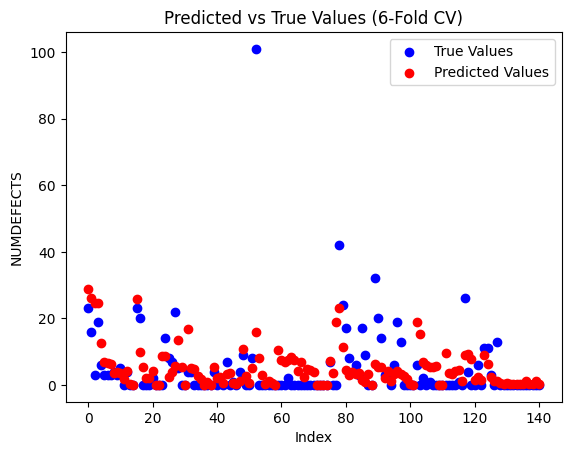

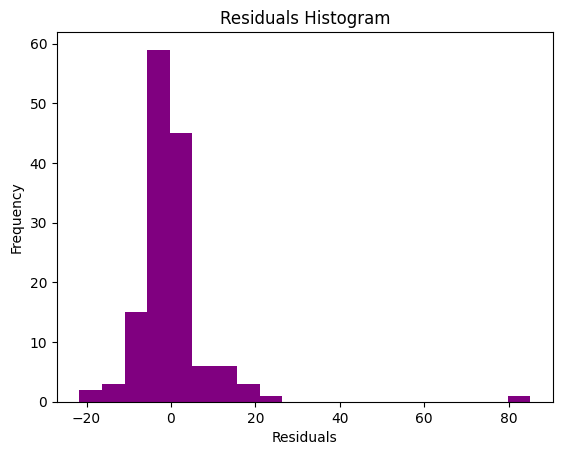

In [3]:
# Initialize the model
best_hyperparameters = {
   'max_depth': None,
    'max_features': 'log2',
    'min_samples_leaf': 4,
    'min_samples_split': 10,
    'n_estimators': 100,
    'min_impurity_decrease': 0.1
}

rf = RandomForestRegressor(**best_hyperparameters)

# Train the model - outliers included
# K-Fold CV
print('\n6-fold')
k_fold_results = k_fold_cv(X, y, rf, cv=6)


LOOCV
R squared (LOOCV): -1.8738335997376838
Average MSE (LOOCV): 88.22302691574843
Average RMSE (LOOCV): 9.392711371896212
Average MAE (LOOCV): 4.403876417833444


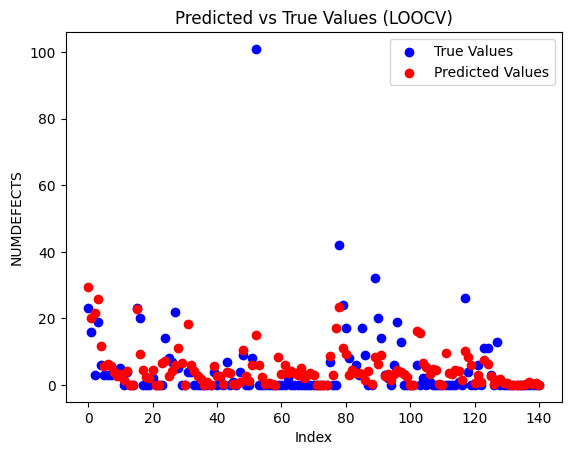

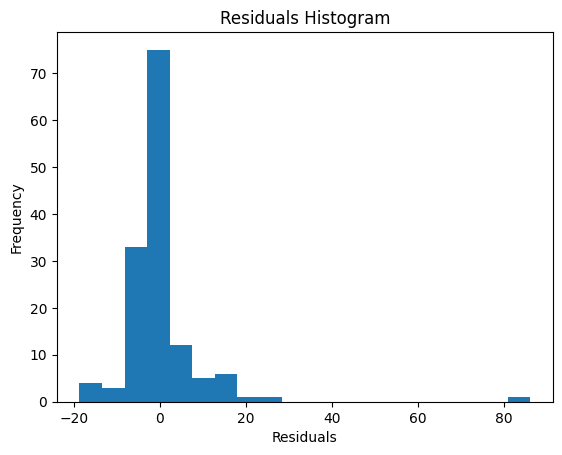

In [4]:
rf2 = RandomForestRegressor(**best_hyperparameters)
# LOOCV
print('LOOCV')
loocv_results = loocv(X, y, rf2)

In [5]:
# Creating a comparison table
comparison_table = pd.DataFrame({
    'Metric': ['R2', 'MSE', 'RMSE', 'MAE'],
    'LOOCV': loocv_results,
    '6-Fold': [
        np.mean(k_fold_results['test_r2']),
        np.mean(k_fold_results['test_mse']),
        np.sqrt(np.mean(k_fold_results['test_mse'])),
        np.mean(k_fold_results['test_mae'])
    ]
})

print(comparison_table)

  Metric      LOOCV     6-Fold
0     R2  -1.873834   0.161269
1    MSE  88.223027  91.838287
2   RMSE   9.392711   9.583229
3    MAE   4.403876   4.727845


LOOCV
R squared (LOOCV): -1.6656155793242253
Average MSE (LOOCV): 30.223638981961972
Average RMSE (LOOCV): 5.497603021496002
Average MAE (LOOCV): 3.5490019649346514


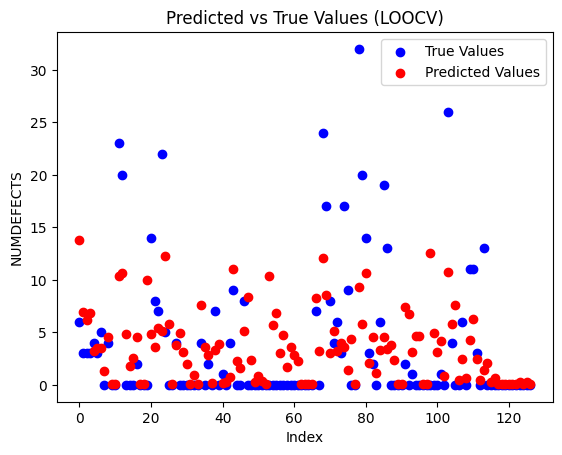

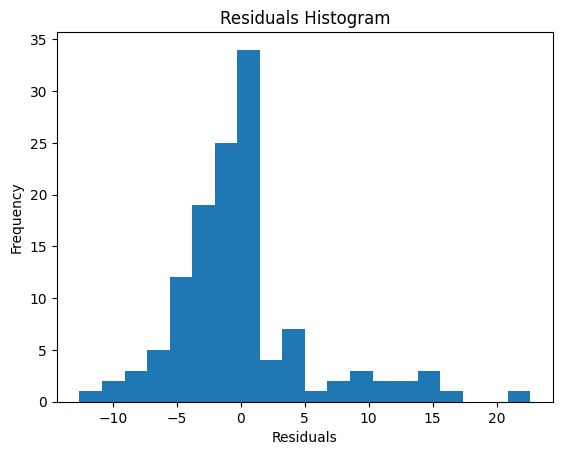


6-fold
Mean MSE: 35.46137628073729
Mean MAE: 3.8084415237543934
Mean R2: -0.3826186799258244
RMSE: 5.9549455312989465


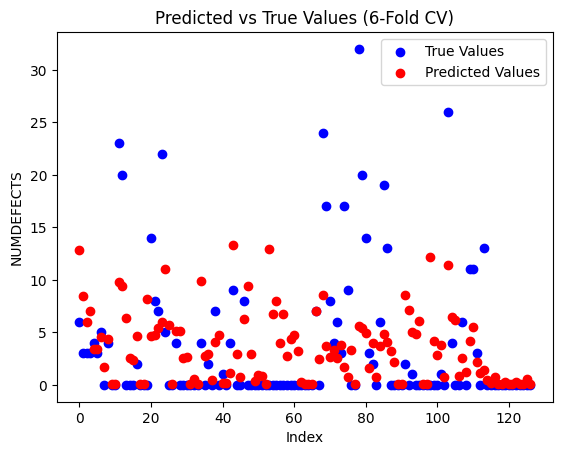

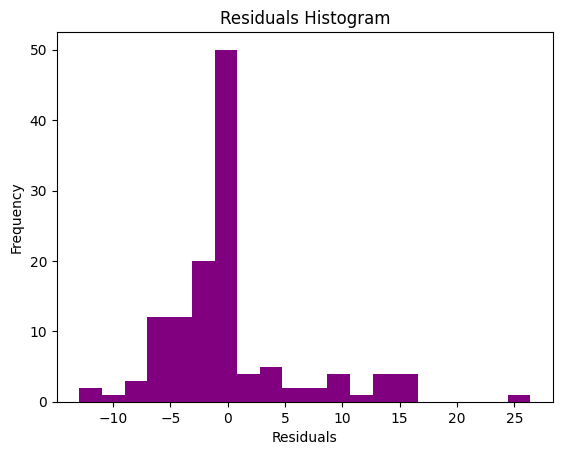

In [6]:
print('LOOCV')
loocv_results_filtered = loocv(X_filtered, y_filtered, rf2)

print('\n6-fold')
k_fold_results_filtered = k_fold_cv(X_filtered, y_filtered, rf2, 6)

In [7]:
# Creating a comparison table
comparison_table2 = pd.DataFrame({
    'Metric': ['R2', 'MSE', 'RMSE', 'MAE'],
    'LOOCV': loocv_results_filtered,
    '6-Fold': [
        np.mean(k_fold_results_filtered['test_r2']),
        np.mean(k_fold_results_filtered['test_mse']),
        np.sqrt(np.mean(k_fold_results_filtered['test_mse'])),
        np.mean(k_fold_results_filtered['test_mae'])
    ]
})

print(comparison_table2)

  Metric      LOOCV     6-Fold
0     R2  -1.665616  -0.382619
1    MSE  30.223639  35.461376
2   RMSE   5.497603   5.954946
3    MAE   3.549002   3.808442
